## Import libraries

In [60]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

np.random.seed(1234)
tf.random.set_seed(1234)

## Load data for post processing

In [61]:
x = tf.linspace(start=200, stop=200, num=1)
y = tf.linspace(start=0.001 + 100*1.48e-5/0.3, stop=100, num=500)
X_test, Y_test = np.meshgrid(x,y)
        
test_data = np.hstack((X_test.flatten()[:, None], Y_test.flatten()[:, None]))
x_test = tf.cast(test_data[:, 0:1],tf.float32)
y_test = tf.cast(test_data[:, 1:2],tf.float32)

y_dns = tf.linspace(start=0.001 + 100*1.48e-5/0.3, stop=100, num=500)
u_dns = (0.3*tf.math.log(y_dns/0.001)/0.418)
k_dns = np.ones_like(y_dns)*0.3*0.3/np.sqrt(0.033)

ABL_trained = tf.keras.models.load_model('Saved_model')

ABL_model = ABL_trained.predict([x_test,y_test])

16/16 [==============================] - 0s 3ms/step


## Defining functions for plots and loss calculation

In [62]:
def profile_plot(model1, y):
    plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(2, 4)
    gs.update(wspace=0.5)
    gs.update(hspace=0.6)
    ax1 = plt.subplot(gs[0, :], )
    ax1.plot(((0.3*np.log(y/0.001)/0.418)),y,'-', label = 'Inlet Profile')
    ax1.plot(model1[0],y,'--', label ='PINN model at outlet')
    ax1.set_title('Streamwise velocity vs Height',fontsize='12')
    ax1.set_ylabel('Height ($m$)',fontsize='12')
    ax1.set_xlabel('Streamwise velocity ($m/s$)',fontsize='12')
    ax1.tick_params(axis='both', labelsize=10)
    ax1.grid(which='both',alpha=0.4)
    ax1.minorticks_on()

    ax2 = plt.subplot(gs[1, :2])
    ax2.plot(np.ones_like(y)*0.3*0.3/np.sqrt(0.033),y,'-')
    ax2.plot(model1[3][1:],y[1:],'--')
    ax2.set_xlim(0.4,.6)
    ax2.set_title('Turbulent kinetic energy \nvs Height',fontsize='12')
    ax2.set_xlabel('Turbulent kinetic energy \n($m^2/s^2$)',fontsize='12')
    ax2.tick_params(axis='both', labelsize=10)
    ax2.grid(which='both',alpha=0.4)
    ax2.minorticks_on()

    ax3 = plt.subplot(gs[1, 2:])
    ax3.plot((0.3**3)/(0.418*y),y)
    ax3.plot(model1[4],y,'--')
    ax3.set_title('Turbulent dissipation rate \nvs Height',fontsize='12')
    ax3.set_xlabel('Turbulent dissipation rate \n($m^2/s^3$)',fontsize='12')
    ax3.tick_params(axis='both', labelsize='10')
    ax2.set_ylabel('Height ($m$)',fontsize='12')
    ax3.grid(which='both',alpha=0.4)
    ax3.minorticks_on()
    ax1.legend(fontsize='10', frameon=False)
    plt.savefig('Plots/ABL_profiles.png',format='png',dpi=300)

## Profile plots

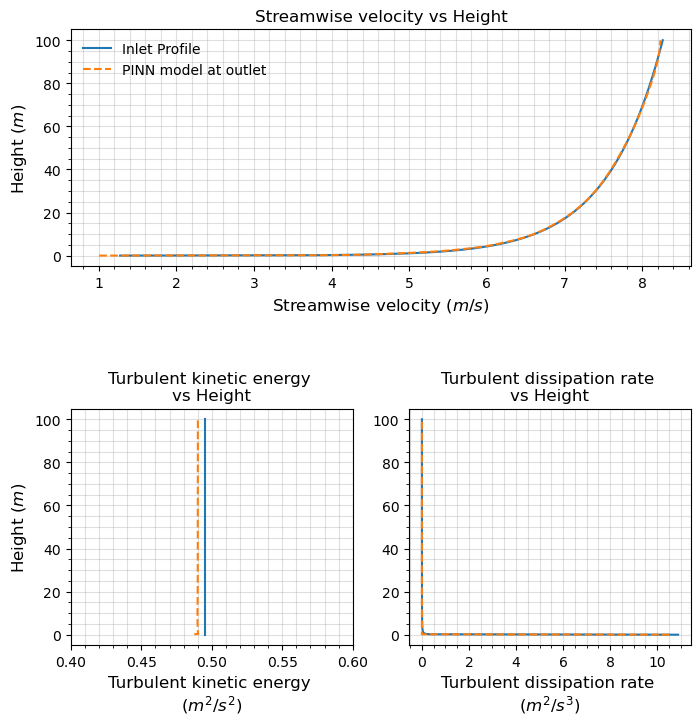

In [63]:
profile_plot(ABL_model, y)